In [1]:
import torch
import torch.nn.functional as F
import torchvision
from torchvision import transforms as T
from utils import data, evaluate, models, train, plot
from torchsummary import summary

# Parameter Initialization

In [2]:
data_path = 'data/asl_alphabet_train'
samples = 12000
split_factor = [0.7, 0.15, 0.15]
batch_size = 128
lr = 4e-4
epochs = 15
image_size = (100, 100)
l2_reg = 1e-3

# Get Train, Val and Test Split

In [3]:
torch.manual_seed(0)
trans = T.Compose([T.ToTensor(), T.Resize(image_size), T.Normalize((0.5190, 0.4992, 0.5140), (0.2244, 0.2523, 0.2616))])
dataset = torchvision.datasets.ImageFolder(root=data_path, transform=trans)
train_loader, valid_loader, test_loader = data.split_dataset(dataset, samples, split_factor, batch_size)

# Model

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device} device')

model = models.Basic_CNN()
model = model.to(device)
summary(model, input_size=(3, image_size[0], image_size[1]))

Using cuda device
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 100, 100]           2,432
         MaxPool2d-2           [-1, 32, 50, 50]               0
         Dropout2d-3           [-1, 32, 50, 50]               0
            Conv2d-4           [-1, 32, 50, 50]           9,248
         MaxPool2d-5           [-1, 32, 25, 25]               0
         Dropout2d-6           [-1, 32, 25, 25]               0
            Conv2d-7           [-1, 64, 25, 25]          18,496
         MaxPool2d-8           [-1, 64, 12, 12]               0
         Dropout2d-9           [-1, 64, 12, 12]               0
           Linear-10                  [-1, 128]       1,179,776
        Dropout1d-11                  [-1, 128]               0
           Linear-12                   [-1, 64]           8,256
        Dropout1d-13                   [-1, 64]               0
           Linear-14 

## 1) Training Phase

In [5]:
train_loss_list, train_accuracy_list, val_loss_list, val_accuracy_list = train.train_model(model, train_loader, valid_loader, 
                                                                                           lr, epochs, device, l2_reg)

Epoch 1 -> Loss = 3.0603 | Train Accuracy = 15.79% | Validation Accuracy = 15.28%
Epoch 2 -> Loss = 2.5133 | Train Accuracy = 30.44% | Validation Accuracy = 26.28%
Epoch 3 -> Loss = 2.0147 | Train Accuracy = 43.79% | Validation Accuracy = 38.06%
Epoch 4 -> Loss = 1.6024 | Train Accuracy = 55.69% | Validation Accuracy = 48.33%
Epoch 5 -> Loss = 1.3501 | Train Accuracy = 64.29% | Validation Accuracy = 57.28%
Epoch 6 -> Loss = 1.0725 | Train Accuracy = 71.00% | Validation Accuracy = 61.94%
Epoch 7 -> Loss = 0.9196 | Train Accuracy = 77.00% | Validation Accuracy = 67.11%
Epoch 8 -> Loss = 0.8238 | Train Accuracy = 78.96% | Validation Accuracy = 69.94%
Epoch 9 -> Loss = 0.6839 | Train Accuracy = 83.68% | Validation Accuracy = 72.83%
Epoch 10 -> Loss = 0.5567 | Train Accuracy = 86.36% | Validation Accuracy = 76.00%
Epoch 11 -> Loss = 0.4734 | Train Accuracy = 89.10% | Validation Accuracy = 78.56%
Epoch 12 -> Loss = 0.4409 | Train Accuracy = 89.15% | Validation Accuracy = 79.44%
Epoch 13 -> L

### Plots

Final Train Accuracy = 93.77%
Final Validation Accuracy  = 81.89%


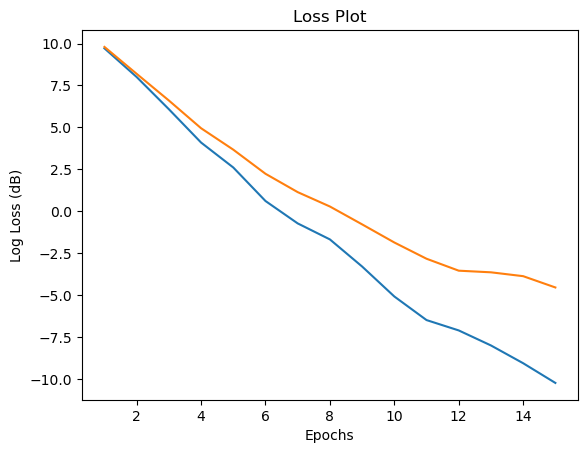

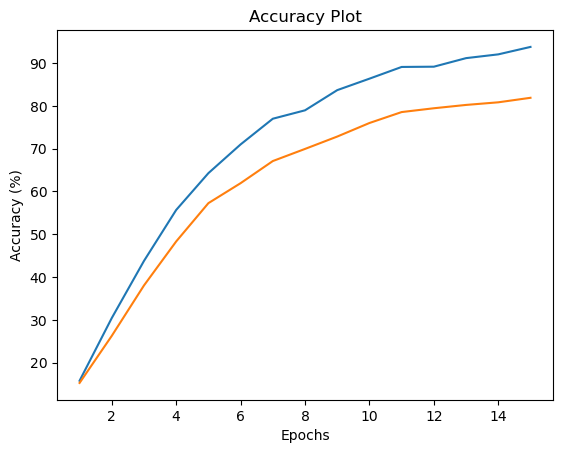

In [6]:
plot.plot_metrics(train_loss_list, train_accuracy_list, val_loss_list, val_accuracy_list)

## 2) Testing Phase

### i) Test Accuracy

In [7]:
test_accuracy, y_true, y_pred = evaluate.evaluate_model(model, test_loader, device)

Test Accuracy = 83.1667%
F1 Score = 0.8305
Recall = 0.8316
Precision = 0.8375


### ii) Confusion Matrix

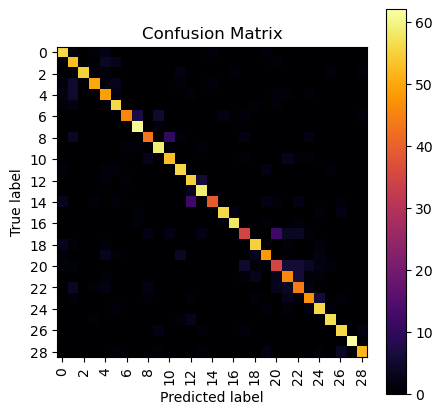

In [8]:
evaluate.conf_matrix(dataset, y_true, y_pred)